In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../../data/processed/trim_small_data.csv', header=0)
print(data.shape)
print(list(data.columns))

(242421, 7)
['sex', 'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn']


In [3]:
data.head()

,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,Female,0 - 9 Years,"Multiple/Other, Non-Hispanic",Yes,Yes,No,Yes
1,Male,0 - 9 Years,Hispanic/Latino,No,No,No,No
2,Male,0 - 9 Years,"Multiple/Other, Non-Hispanic",No,No,No,No
3,Male,10 - 19 Years,Hispanic/Latino,Yes,No,No,Yes
4,Female,10 - 19 Years,Hispanic/Latino,No,No,No,No


In [4]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

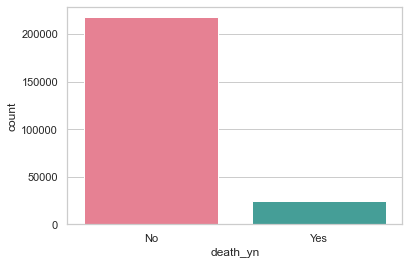

'\nAs you can see in the graph below, the dataset is imbalanced.\n'

In [5]:
sns.countplot(x='death_yn', data=data, palette='husl')
plt.show()

'''
As you can see in the graph below, the dataset is imbalanced.
'''

The median of age groups is: 50 - 59 Years


Text(0, 0.5, 'Frequency')

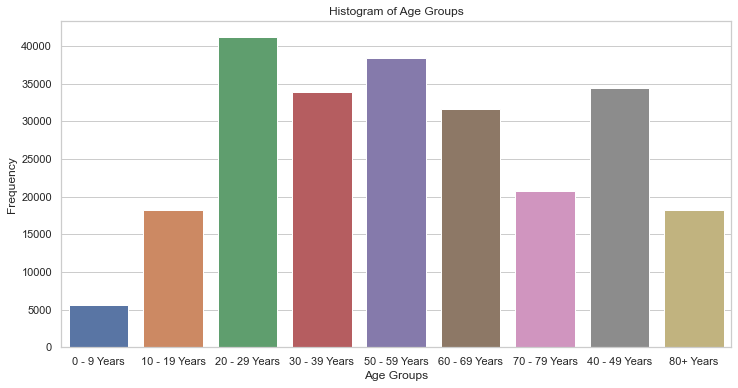

In [6]:
'''
Helper function to get key from value of a dictionary
'''
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = ""
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys = item[0]
    return  listOfKeys

import collections
ctr = collections.Counter(data['age_group'])
sum = len(data['age_group'])/2
for i in ctr.values():
    sum = sum - i
    if sum <= 0:
        print("The median of age groups is: " + getKeysByValue(ctr, i))
        break

plt.figure(figsize=(12,6))
sns.countplot(x='age_group', data=data)
plt.title('Histogram of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

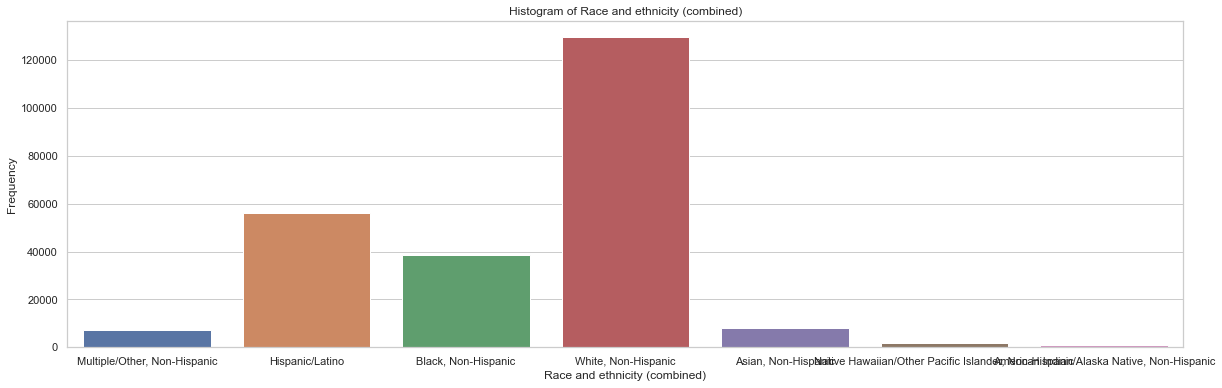

In [7]:
plt.figure(figsize=(20,6))
sns.countplot(x='Race and ethnicity (combined)', data=data)
plt.title('Histogram of Race and ethnicity (combined)')
plt.xlabel('Race and ethnicity (combined)')
plt.ylabel('Frequency')

In [8]:
'''
Slightly different from what we did in hw, we first modified the features by split all possible choices. 
For example, for age_group, I split that feature into 9 features: age_group_0_to_9, age_group_10_to_19, etc. 
1 for True and 0 for False.
'''
x_vars = ['sex', 'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn', 'medcond_yn']

for var in x_vars:
    x_list = 'var'+'_'+var
    x_list = pd.get_dummies(data[var], prefix=var)
    temp = data.join(x_list)
    data = temp
    
data_vars = data.columns.values.tolist()
new_vars = [i for i in data_vars if i not in x_vars]

new_data = data[new_vars]
new_data.head()

,death_yn,sex_Female,sex_Male,age_group_0 - 9 Years,age_group_10 - 19 Years,age_group_20 - 29 Years,age_group_30 - 39 Years,age_group_40 - 49 Years,age_group_50 - 59 Years,age_group_60 - 69 Years,...,Race and ethnicity (combined)_Hispanic/Latino,"Race and ethnicity (combined)_Multiple/Other, Non-Hispanic","Race and ethnicity (combined)_Native Hawaiian/Other Pacific Islander, Non-Hispanic","Race and ethnicity (combined)_White, Non-Hispanic",hosp_yn_No,hosp_yn_Yes,icu_yn_No,icu_yn_Yes,medcond_yn_No,medcond_yn_Yes
0,No,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
1,No,0,1,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
2,No,0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,No,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
4,No,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [9]:
'''
Using imblearn package to implement resampling algorithm SMOTE, to balance the dataset.

Algorithm explain here:
'''
X = new_data.loc[:, new_data.columns != 'death_yn']
y = new_data.loc[:, new_data.columns == 'death_yn']

from imblearn.over_sampling import SMOTE

resampling = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
columns = X_train.columns
resampled_X, resampled_y = resampling.fit_sample(X_train, y_train)
resampled_X = pd.DataFrame(data=resampled_X, columns=columns )
resampled_y = pd.DataFrame(data=resampled_y,columns=['death_yn'])

print("Number of rows after resampling is: ", len(resampled_X))
print("Number of death records after resampling is: ", len(resampled_y[resampled_y['death_yn']=="No"]))
print("Number of survived records after resampling is: ", len(resampled_y[resampled_y['death_yn']=="Yes"]))

Number of rows after resampling is:  391876
Number of death records after resampling is:  195938
Number of survived records after resampling is:  195938


In [10]:
import warnings
warnings.filterwarnings('ignore')

'''
Using sklearn package to analyze and remove insignificant splitted features.

Algorithm explain here:
'''

new_vars = new_data.columns.values.tolist()
y = ['death_yn']
X = [i for i in new_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(resampled_X, resampled_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[3 2 5 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [11]:
cols=['sex_Male', 'age_group_20 - 29 Years', 'age_group_30 - 39 Years', 'age_group_40 - 49 Years', 'age_group_50 - 59 Years',
      'age_group_60 - 69 Years', 'age_group_70 - 79 Years', 'age_group_80+ Years', 'Race and ethnicity (combined)_American Indian/Alaska Native, Non-Hispanic'
      ,'Race and ethnicity (combined)_Asian, Non-Hispanic','Race and ethnicity (combined)_Black, Non-Hispanic', 'Race and ethnicity (combined)_Hispanic/Latino'
      ,'Race and ethnicity (combined)_Multiple/Other, Non-Hispanic', 'Race and ethnicity (combined)_White, Non-Hispanic', 'hosp_yn_No'
      ,'hosp_yn_Yes', 'icu_yn_No','icu_yn_Yes','medcond_yn_No','medcond_yn_Yes']

X = resampled_X[cols]
y = resampled_y

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

'''
Perform 10 fold validation, and takes the average. sklearn package used.

Algorithm explain here:
'''

accuracy = 0
confusion = [[0, 0], [0, 0]]
confusion = np.array(confusion)

kf = KFold(n_splits=10)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X.loc[train, :], X.loc[test, :], y.loc[train, :], y.loc[test, :]
    logreg.fit(X_train, y_train)
    accuracy = accuracy + logreg.score(X_test, y_test)
    y_pred = logreg.predict(X_test)
    confusion = confusion + confusion_matrix(y_test, y_pred)
    
accuracy = accuracy / 10

In [39]:
print('Accuracy of 10-fold cross validation is: ' + format(accuracy))
print('The Confusion Matrix is: \n', confusion)
TP = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TN = confusion[1][1]

import math

sensitivity = TP / (TP + FN)
print('The Sensitivity is: ' + format(sensitivity))
specificity = TN / (FP + TN)
print('The Specificity is: ' + format(specificity))
g_mean = math.sqrt(sensitivity * specificity)
print('The G-Mean is: ' + format(g_mean))
precision = TP / (TP + FP)
print('The Precision is: ' + format(precision))
recall = TP / (TP + FN)
print('The Recall is: ' + format(recall))
f_measure = (2 * precision * recall) / (precision + recall)
print('The F-Measure is: ' + format(f_measure))

Accuracy of 10-fold cross validation is: 0.8947781645771892
The Confusion Matrix is: 
 [[170538  25400]
 [ 15834 180104]]
The Sensitivity is: 0.9150408859699954
The Specificity is: 0.8764014325755216
The G-Mean is: 0.8955127823371806
The Precision is: 0.8703671569578132
The Recall is: 0.9150408859699954
The F-Measure is: 0.8921451178363108
